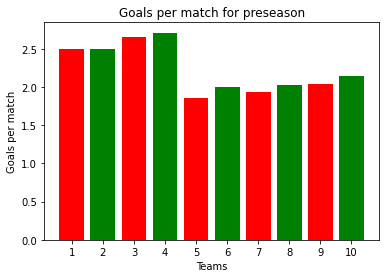

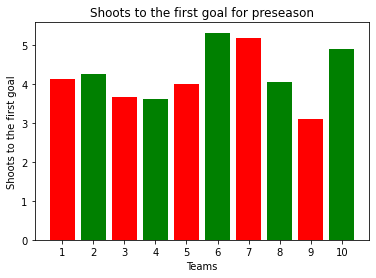

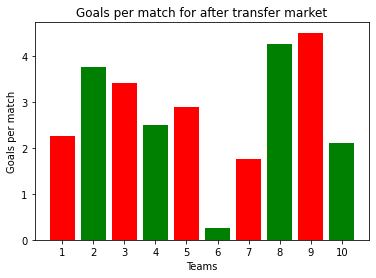

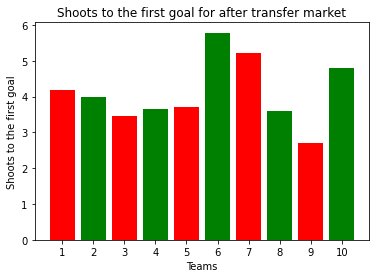

Clasamentul este:
1 .  ['Atletico Madrid', 31, 23, 8, 19]
2 .  ['Inter Milano', 26, 26, 0, 16]
3 .  ['PSG', 31, 26, 5, 15]
4 .  ['Manchester City', 27, 23, 4, 15]
5 .  ['Juventus Torino', 30, 22, 8, 14]
6 .  ['Bayern Munchen', 37, 31, 6, 13]
7 .  ['Real Madrid', 22, 16, 6, 13]
8 .  ['Chelsea', 19, 29, -10, 11]
9 .  ['FC Barcelona', 14, 23, -9, 10]
10 .  ['Manchester United', 6, 24, -18, 3]
{1: [['Real Madrid', 'Chelsea', 0, 2], ['Bayern Munchen', 'Atletico Madrid', 3, 5], ['PSG', 'Juventus Torino', 2, 6], ['Manchester City', 'FC Barcelona', 2, 4], ['Inter Milano', 'Manchester United', 5, 0]], 2: [['Atletico Madrid', 'Real Madrid', 2, 6], ['Juventus Torino', 'Chelsea', 2, 2], ['FC Barcelona', 'Bayern Munchen', 1, 7], ['Manchester United', 'PSG', 2, 3], ['Manchester City', 'Inter Milano', 5, 3]], 3: [['Real Madrid', 'Juventus Torino', 2, 1], ['Atletico Madrid', 'FC Barcelona', 1, 1], ['Chelsea', 'Manchester United', 2, 1], ['Inter Milano', 'Bayern Munchen', 4, 1], ['PSG', 'Manchester Cit

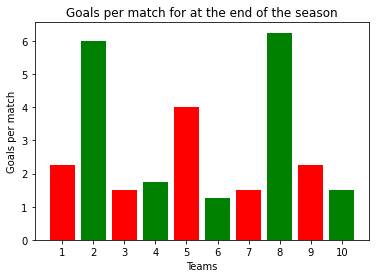

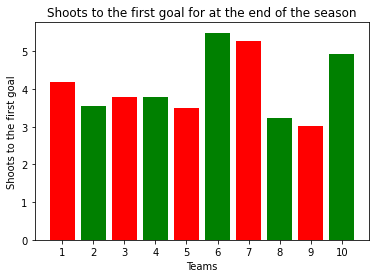

Clasamentul este:
1 .  ['Juventus Torino', 82, 44, 38, 39]
2 .  ['Atletico Madrid', 58, 47, 11, 31]
3 .  ['Inter Milano', 59, 54, 5, 31]
4 .  ['Bayern Munchen', 88, 61, 27, 30]
5 .  ['Real Madrid', 46, 36, 10, 28]
6 .  ['Manchester City', 46, 48, -2, 25]
7 .  ['PSG', 53, 58, -5, 23]
8 .  ['FC Barcelona', 34, 47, -13, 23]
9 .  ['Chelsea', 36, 64, -28, 18]
10 .  ['Manchester United', 14, 57, -43, 7]


,0,1,2,3,4
0,Juventus Torino,82,44,38,39
1,Atletico Madrid,58,47,11,31
2,Inter Milano,59,54,5,31
3,Bayern Munchen,88,61,27,30
4,Real Madrid,46,36,10,28
5,Manchester City,46,48,-2,25
6,PSG,53,58,-5,23
7,FC Barcelona,34,47,-13,23
8,Chelsea,36,64,-28,18
9,Manchester United,14,57,-43,7


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"[Real Madrid, Chelsea, 0, 2]","[Atletico Madrid, Real Madrid, 2, 6]","[Real Madrid, Juventus Torino, 2, 1]","[FC Barcelona, Real Madrid, 0, 5]","[Real Madrid, Manchester United, 0, 1]","[Inter Milano, Real Madrid, 1, 0]","[Real Madrid, Manchester City, 0, 1]","[PSG, Real Madrid, 5, 6]","[Real Madrid, Bayern Munchen, 3, 3]","[Real Madrid, Chelsea, 5, 3]","[Atletico Madrid, Real Madrid, 3, 3]","[Real Madrid, Juventus Torino, 2, 5]","[FC Barcelona, Real Madrid, 3, 0]","[Real Madrid, Manchester United, 5, 0]","[Inter Milano, Real Madrid, 0, 0]","[Real Madrid, Manchester City, 3, 1]","[PSG, Real Madrid, 1, 1]","[Real Madrid, Bayern Munchen, 5, 4]"
1,"[Bayern Munchen, Atletico Madrid, 3, 5]","[Juventus Torino, Chelsea, 2, 2]","[Atletico Madrid, FC Barcelona, 1, 1]","[Manchester United, Juventus Torino, 1, 2]","[Inter Milano, FC Barcelona, 1, 1]","[Manchester City, Manchester United, 2, 0]","[PSG, Inter Milano, 2, 3]","[Bayern Munchen, Manchester City, 6, 5]","[Chelsea, PSG, 0, 3]","[Bayern Munchen, Atletico Madrid, 4, 4]","[Juventus Torino, Chelsea, 7, 3]","[Atletico Madrid, FC Barcelona, 3, 1]","[Manchester United, Juventus Torino, 0, 4]","[Inter Milano, FC Barcelona, 2, 5]","[Manchester City, Manchester United, 2, 1]","[PSG, Inter Milano, 3, 4]","[Bayern Munchen, Manchester City, 7, 2]","[Chelsea, PSG, 1, 1]"
2,"[PSG, Juventus Torino, 2, 6]","[FC Barcelona, Bayern Munchen, 1, 7]","[Chelsea, Manchester United, 2, 1]","[Atletico Madrid, Inter Milano, 4, 2]","[Juventus Torino, Manchester City, 2, 4]","[FC Barcelona, PSG, 0, 3]","[Manchester United, Bayern Munchen, 1, 3]","[Inter Milano, Chelsea, 6, 4]","[Manchester City, Atletico Madrid, 2, 3]","[PSG, Juventus Torino, 3, 7]","[FC Barcelona, Bayern Munchen, 2, 5]","[Chelsea, Manchester United, 4, 2]","[Atletico Madrid, Inter Milano, 2, 4]","[Juventus Torino, Manchester City, 4, 2]","[FC Barcelona, PSG, 4, 1]","[Manchester United, Bayern Munchen, 1, 8]","[Inter Milano, Chelsea, 7, 3]","[Manchester City, Atletico Madrid, 2, 2]"
3,"[Manchester City, FC Barcelona, 2, 4]","[Manchester United, PSG, 2, 3]","[Inter Milano, Bayern Munchen, 4, 1]","[Manchester City, Chelsea, 1, 4]","[PSG, Atletico Madrid, 5, 1]","[Bayern Munchen, Juventus Torino, 3, 4]","[Chelsea, FC Barcelona, 2, 2]","[Atletico Madrid, Manchester United, 4, 0]","[Juventus Torino, Inter Milano, 9, 1]","[Manchester City, FC Barcelona, 2, 3]","[Manchester United, PSG, 1, 4]","[Inter Milano, Bayern Munchen, 6, 6]","[Manchester City, Chelsea, 2, 1]","[PSG, Atletico Madrid, 4, 6]","[Bayern Munchen, Juventus Torino, 5, 8]","[Chelsea, FC Barcelona, 2, 0]","[Atletico Madrid, Manchester United, 0, 1]","[Juventus Torino, Inter Milano, 5, 5]"
4,"[Inter Milano, Manchester United, 5, 0]","[Manchester City, Inter Milano, 5, 3]","[PSG, Manchester City, 1, 5]","[Bayern Munchen, PSG, 3, 7]","[Chelsea, Bayern Munchen, 1, 8]","[Atletico Madrid, Chelsea, 6, 2]","[Juventus Torino, Atletico Madrid, 2, 5]","[FC Barcelona, Juventus Torino, 2, 2]","[Manchester United, FC Barcelona, 0, 3]","[Inter Milano, Manchester United, 4, 0]","[Manchester City, Inter Milano, 4, 1]","[PSG, Manchester City, 3, 2]","[Bayern Munchen, PSG, 6, 2]","[Chelsea, Bayern Munchen, 0, 6]","[Atletico Madrid, Chelsea, 5, 0]","[Juventus Torino, Atletico Madrid, 5, 2]","[FC Barcelona, Juventus Torino, 0, 7]","[Manchester United, FC Barcelona, 2, 2]"


In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

file=open("output.txt","w")
def round_robin(teams, rounds):
    # bye
    if len(teams) % 2:
        teams.append(None)

    schedule = []
    for turn in range(rounds):
        pairings = []
        for i in range(int(len(teams) / 2)):
            pairing = (teams[i], teams[len(teams) - i - 1])
            # alternate first team
            if i == 0 and turn % 2:
                pairing = pairing[::-1]
            # alternate based on the team's previous round appearance
            if schedule and None not in pairing:
                previous_round = list(sum(schedule[-1], ()))
                for team in pairing:
                    if team in previous_round and pairing[previous_round.index(team) % 2] == team:
                        pairing = pairing[::-1]
            pairings.append(pairing)
        teams.insert(1, teams.pop())
        schedule.append(pairings)

    return schedule


def goalScoring(team,statistics,playing):
  #playing={home/away}

  #first we generate a random number of shoots influenced by where the match is played
  if playing=="home":
    random_shoots=random.uniform(1,6)
  else:
    random_shoots=random.uniform(0,5)

  #we want to use geometrical distribution for
  #finding out from how many shots the team manage to score
  #the probability=random_shoots/(how many shoots are in statistics)
  if random_shoots>statistics[team][1]:
    #they manage to score from first shoot
    shoots=1
  else:
    shoots=random.geometric(random_shoots/statistics[team][1])

  #for calculating the number of goals
  #we use the average number o goals from statistics
  #and add a variable which give a boost for the team 
  #which depends on the chnces of scoring the first goal
  return random.poisson(lam=(statistics[team][0]+((random_shoots/shoots)/10)))


def updateSatistics(statistics,results,nr_of_matches,starting_round):
  for key in statistics:
    goals=0
    cnt=1
    for round in results:
      if cnt<starting_round:
        cnt+=1
      else:
        for match in results[round]:
          if match.count(key)>0:
            if match[0]==key:
              goals+=match[2]
            elif match[1]==key:
              goals+=match[3]
            break

    #if the team increased their rate of goals per match then their shots to the first goal
    #will decrease by 5%*difference between the last rate of goals and the current one
    #otherwise it will increase with the asme value     
    if goals/nr_of_matches>=statistics[key][0]:
      statistics[key][1]-=(0.05*(goals/nr_of_matches-statistics[key][0]))*statistics[key][1]
    else:
      statistics[key][1]+=(0.05*(statistics[key][0]-goals/nr_of_matches))*statistics[key][1]
    statistics[key][0]=goals/nr_of_matches

def makeTransfer():
  p=random.uniform(0,1)
  if p<=0.6:
    transfer=True
  elif p>0.6 and p<0.98:
    transfer=False
  else:
    transfer="Legendary"
  
  return p,transfer

def isTransferGood(p_transfer):
  #here I will use Bayes Theorem
  #A-player is good
  #B-transfer is made
  #I want to find th probility that if I made a transfer it is  a good one
  #p(A|B)=p(B|A)*p(A)/p(B)

  #p(A)=the probability that a transfer is good is 40%
  p_good=random.uniform(0,0.4)
  

  #p(B)=the probability of making a transfer=p_transfer
 

  #p(B|A)= the probability of making a transfer if the team know is a good one
  #it's not 100% because exists a chance that they don't have enough money
  p_=random.uniform(0.90,1)

  if (p_good*p_)/p_transfer<=0.6:
    return True
  return False



#here is the Winter Transfer Market in competitional pause
#every team is allowed to transfer maximum 2 players
#if a transfer is not good it will not influence the statistics of a team because he won't play
#if a transfer is good he will increase the number of goals per match by 5% and decrease the number of shots by 2.5%
def transferMarket(statistics):
  for key in statistics:
    transfer1_rate,transfer1_result=makeTransfer()
    transfer2_rate,transfer2_result=makeTransfer()

    if transfer1_result==True:
      if isTransferGood(transfer1_rate)==True:
        statistics[key][0]+=statistics[key][0]*0.05
        statistics[key][1]-=statistics[key][1]*0.025
    elif transfer1_result=="Legendary":
      #if the transfer is legendary he is automatically a good one and it will help the team 10x an usual transfer
      statistics[key][0]+=statistics[key][0]*0.5
      statistics[key][1]-=statistics[key][1]*0.25
      print("Legendara pentru: ",key)

    if transfer2_result==True:
      if isTransferGood(transfer2_rate)==True:
        statistics[key][0]+=statistics[key][0]*0.05
        statistics[key][1]-=statistics[key][1]*0.025
    elif transfer1_result=="Legendary":
      statistics[key][0]+=statistics[key][0]*0.5
      statistics[key][1]-=statistics[key][1]*0.25
      print("Legendara pentru: ",key)

def cmp(a):
  # if a[4]!=b[4]:
  #   return a[4]>b[4]
  # else:
  #   if a[3]!=b[3]:
  #     return a[3]>b[3]
  #   else:
  #     if a[1]!=b[1]:
  #       return a[1]>b[1]
  #     return a[0]<b[0]
  return -a[4],-a[3],-a[1],a[0]
  
def tabelScore(results,teams):
  ranking={}

  for team in teams:
    #for every team I actualise the number of goals scored, number of goals taken, the goal difference and the number of points
    ranking[team]=[0,0,0,0]

  for round in results:
    for match in results[round]:
      #actualise the number of goals scored,taken and goal difference for both teams
      ranking[match[0]][0]+=match[2]
      ranking[match[0]][1]+=match[3]
      ranking[match[0]][2]=ranking[match[0]][0]-ranking[match[0]][1]
      ranking[match[1]][0]+=match[3]
      ranking[match[1]][1]+=match[2]
      ranking[match[1]][2]=ranking[match[1]][0]-ranking[match[1]][1]

      #actualise the number of points for both teams
      if match[2]>match[3]:
        ranking[match[0]][3]+=3
      elif match[2]<match[3]:
        ranking[match[1]][3]+=3
      else:
        ranking[match[0]][3]+=1
        ranking[match[1]][3]+=1

  ranks=[]
  for team in ranking:
    t=[]
    t.append(team)
    t.append(ranking[team][0])
    t.append(ranking[team][1])
    t.append(ranking[team][2])
    t.append(ranking[team][3])
    ranks.append(t)
  
  r=sorted(ranks,key=cmp) 
  return r


def makeBarChart(statistics,teams,message):
  goals=[]
  shoots=[]
  tick=[i+1 for i in range(10)]
  for key in statistics:
    goals.append(statistics[key][0])
    shoots.append(statistics[key][1])
  
  plt.bar(teams,goals,tick_label=tick,width=0.8,color=['red','green'])

  plt.xlabel('Teams')
  plt.ylabel('Goals per match')
  text="Goals per match for "
  text+=message
  plt.title(text)
  plt.show()


  plt.bar(teams,shoots,tick_label=tick,width=0.8,color=['red','green'])

  plt.xlabel('Teams')
  plt.ylabel('Shoots to the first goal')
  text="Shoots to the first goal for "
  text+=message
  plt.title(text)
  plt.show()

#printing the matches and table of score in an output file
#playing=1 means that the first team plays home
#playing=-1 means that the second team plays home
#step=the round from which we print data
def writeResults(results,tabelScore,playing,step):
  #file=open("output.txt","w")
  file.write("Matches:\n")
  cnt=1
  if playing==1:
      for round in results:
        if cnt<step:
          cnt+=1
        else:
          out1="Round "+str(round)+'\n'
          file.write(out1)
          for match in results[round]:
            out=match[0]+'-'+match[1]+"                   "+str(match[2])+'-'+str(match[3])+'\n'
            file.write(out)

      file.write('\n\nTable score:\n')
      file.write("Team Name                   F         A         GA          Points\n")
      rnd=1
      for team in tabelScore:
        out=str(rnd)+'.'+team[0]+'              '+str(team[1])+'          '+str(team[2])+'          '+str(team[3])+'          '+str(team[4])+'\n'
        file.write(out)
        rnd+=1

  else:
      for round in results:
        if cnt<step:
          cnt+=1
        else:
          out1="Round "+str(round)+'\n'
          file.write(out1)
          for match in results[round]:
            out=match[1]+'-'+match[0]+"                   "+str(match[3])+'-'+str(match[2])+'\n'
            file.write(out)

      file.write('\n\nTable score:\n')
      file.write("Team Name                   F         A         GA          Points\n")
      rnd=1
      for team in tabelScore:
        out=str(rnd)+'.'+team[0]+'              '+str(team[1])+'          '+str(team[2])+'          '+str(team[3])+'          '+str(team[4])+'\n'
        file.write(out)
        rnd+=1

  #file.close()

#main

teams=["Real Madrid","Bayern Munchen","PSG","Manchester City","Inter Milano","Manchester United","FC Barcelona","Juventus Torino","Atletico Madrid","Chelsea"]

schedule=round_robin(teams,9)

#from the previus championship we have some statistics 
#about the number of goals scored in a match for a team 
#and about the number of shots until a team manage to score a goal


#statistics is formed by a team and
#for each team we know the average goal for a match
#and the average number of shots for the team to mange to score a goal
statistics={
    "Real Madrid":[2.5,4.13],
    "Bayern Munchen":[2.5,4.26],
    "PSG":[2.66,3.66],
    "Manchester City":[2.71,3.61],
    "Inter Milano":[1.86,3.99],
    "Manchester United":[2,5.31],
    "FC Barcelona":[1.93,5.18],
    "Juventus Torino":[2.02,4.04],
    "Atletico Madrid":[2.04,3.09],
    "Chelsea":[2.14,4.88]
}

makeBarChart(statistics,teams,'preseason')
results={}
cnt=1

for round in schedule:
  results[cnt]=[]

  for match in round:
    goals_first=goalScoring(match[0],statistics,"home")
    goals_second=goalScoring(match[1],statistics,"away")
    res=[]
    res.append(match[0])
    res.append(match[1])
    res.append(goals_first)
    res.append(goals_second)
    results[cnt].append(res)
  cnt+=1
  
  #here i will update the statistics after 5 matches(half of the first part of the championship)
  if cnt==5:
    updateSatistics(statistics,results,5,1)
    

#here i will update the statitics after finishing the first part of championship
updateSatistics(statistics,results,4,6)


transferMarket(statistics)
makeBarChart(statistics,teams,'after transfer market')

ranking=tabelScore(results,teams)
writeResults(results,ranking,1,1)


print('Clasamentul este:')
place=1
for team in ranking:
  print(place,". ",team)
  place+=1
#here are the matches from the second part of the tourment
for round in schedule:
  results[cnt]=[]

  for match in round:
    goals_first=goalScoring(match[0],statistics,"away")
    goals_second=goalScoring(match[1],statistics,"home")
    res=[]
    res.append(match[0])
    res.append(match[1])
    res.append(goals_first)
    res.append(goals_second)
    results[cnt].append(res)
  cnt+=1
  
  #here i will update the statistics after 5 matches(half of the first part of the championship)
  if cnt==14:
    updateSatistics(statistics,results,5,10)
    
updateSatistics(statistics,results,4,15)

print(results)

ranking=tabelScore(results,teams)


makeBarChart(statistics,teams,'at the end of the season')
print('Clasamentul este:')
place=1
for team in ranking:
  print(place,". ",team)
  place+=1

#printing the results and table score in output file

writeResults(results,ranking,-1,10)
file.close()

df=pd.DataFrame(ranking)
display(df)

df1=pd.DataFrame(results)
display(df1)



sample_data/
